In [3]:
from __future__ import print_function

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,TimeDistributed
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import layers,models
import h5py
from keras.models import Model
from keras.layers import Layer
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import heapq
import warnings
warnings.filterwarnings('ignore')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13454934324211222130
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17170855429221785989
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17274915673284195313
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5489688576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17577991737409283082
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [4]:

batch_size = 10
num_classes = 2
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets

#(x_train, y_train), (x_test, y_test) = mnist.load_data()


p='mnist_10instance.hdf5';

db=h5py.File(p);


X, y = db['images'],db['labels'];


# Split train and valid

i = int(db["images"].shape[0] * 1/3)

x_train, x_test, y_train, y_test = X[:i],X[i:],y[:i],y[i:];

print(x_train.shape)

"""

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

"""
# convert class vectors to binary class matrices

"""
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])
"""





"""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
"""



class ScaleLayer(Layer):

    def __init__(self,scale, **kwargs):

        self.scale=scale;
        
        super(ScaleLayer, self).__init__(**kwargs)


    def build(self, input_shape):
        super(ScaleLayer, self).build(input_shape)

       
    def call(self, inputs):

        output=tf.image.resize(inputs,[self.scale,self.scale],method=tf.image.ResizeMethod.BICUBIC)


        output = tf.keras.backend.concatenate((output, output,output),axis=-1) 

        print(output.shape)

        return output

       

    def compute_output_shape(self, input_shape):
        return (input_shape[0],self.scale,self.scale,3)





classes = 1;
pooling = 'No'
num_sequence = 10;
include_top = False;

input_shape =  [num_sequence,img_rows, img_cols, 1];


img_input = layers.Input(shape=input_shape)

x = TimeDistributed(ScaleLayer(224))(img_input)

x = TimeDistributed(layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1'))(x)
x = TimeDistributed(layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))(x)

# Block 2
x = TimeDistributed(layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv1'))(x)
x = TimeDistributed(layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block2_conv2'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))(x)

# Block 3
x = TimeDistributed(layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv1'))(x)
x = TimeDistributed(layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv2'))(x)
x = TimeDistributed(layers.Conv2D(256, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block3_conv3'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))(x)

# Block 4
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv1'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv2'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block4_conv3'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))(x)

# Block 5
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv1'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv2'))(x)
x = TimeDistributed(layers.Conv2D(512, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block5_conv3'))(x)
x = TimeDistributed(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))(x)

if include_top:
    # Classification block
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    x = layers.Dense(classes, activation='softmax', name='predictions')(x)
else:
    if pooling == 'avg':
        x = layers.GlobalAveragePooling2D()(x)
    elif pooling == 'max':
        x = layers.GlobalMaxPooling2D()(x)
    elif pooling =='No':
        x = x;

# Ensure that the model takes into account
# any potential predecessors of `input_tensor`.
#if input_tensor is not None:
#    inputs = keras_utils.get_source_inputs(input_tensor)
#else:
inputs = img_input
# Create model.
base_model = models.Model(inputs, x, name='vgg16')

weights ='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5';

base_model.load_weights(weights)

class AttentionLayer(Layer):

    def __init__(self, **kwargs):

        
        super(AttentionLayer, self).__init__(**kwargs)


    def build(self, input_shape):
        super(AttentionLayer, self).build(input_shape)


        self.input_shape_r = input_shape;
        print('self.input_shape_r')
        print(self.input_shape_r)

        L_size = 256;

        self.w = self.add_weight(name='w', 
                              shape=[L_size,1],
                              initializer='uniform',
                              trainable=True)
        self.V = self.add_weight(name='V', 
                      shape=[input_shape[2],L_size],
                      initializer='uniform',
                      trainable=True)

        self.U = self.add_weight(name='U', 
                      shape=[input_shape[2],L_size],
                      initializer='uniform',
                      trainable=True)

        

        self.bias_w = self.add_weight(shape=[1,1],
                              initializer='uniform',
                              name='bias_w')
        self.bias_V = self.add_weight(shape=[1,L_size],
                                      initializer='uniform',
                                      name='bias_V')
        self.bias_U = self.add_weight(shape=[1,L_size],
                                      initializer='uniform',
                                      name='bias_U')
        
        self.Save = self.add_weight(name='ForSave', 
              shape=[10,10],
              initializer='uniform',
              trainable=False)
      

  
       
    def call(self, inputs):


        inputs_r = K.expand_dims(inputs,axis=-2)


        print('inputs')
        print(inputs_r.shape)


        dot_products_V = K.dot(inputs_r,self.V)
        dot_products_U = K.dot(inputs_r,self.U)

        dot_products_V += self.bias_V;
        dot_products_U += self.bias_U;


        print('dot product')
        print(dot_products_V.shape)

        tanh_V = K.tanh(dot_products_V);
        sigmoid_U = K.sigmoid(dot_products_U);

        print('tanh')
        print(tanh_V.shape)

        comb_UV = tanh_V*sigmoid_U;

        print('combUV')
        print(comb_UV.shape)

        attention_weights = K.dot(comb_UV,self.w);

        attention_weights +=self.bias_w;

        attention_weights = K.exp(attention_weights);


        print('attention_weights')
        print(attention_weights.shape)


        attention_weights /= K.cast(K.sum(attention_weights,
                                  axis=1,
                                  keepdims=True) + K.epsilon(),
                            K.floatx());
        print('attention_weights sum')
        print(attention_weights.shape)

        #attention_weights = K.expand_dims(attention_weights);
        attention_weights= K.squeeze(attention_weights,axis = -1);
        print('attention_weights last')
        print(attention_weights.shape)

        weighted_output = inputs * attention_weights;

        self.Save =  attention_weights;


        output = K.sum(weighted_output, axis=1)

        print('output')
        print(output.shape)

        return output


       

    def compute_output_shape(self, input_shape):
        return (input_shape[0],input_shape[2])






class FCHeadNet:
  @staticmethod
  def build(baseModel, classes, D):
    # initialize the head model that will be placed on top of
    # the base, then add a FC layer
    headModel = baseModel.output
    headModel = TimeDistributed(layers.Flatten(name='flatten'))(headModel)
    headModel = TimeDistributed(layers.Dense(D, activation='relu', name='fc1'))(headModel)
    headModel = TimeDistributed(layers.Dense(D, activation='relu', name='fc2'))(headModel)
    headModel = AttentionLayer(name='attentionlayer')(headModel)
    headModel = layers.Dense(classes, activation='sigmoid', name='predictions')(headModel)
    # add a softmax layer
    #headModel = layers.Dense(classes, activation="softmax")(headModel)
    #headModel = layers.Dense(classes, activation='softmax', name='predictions2')(headModel)

    # return the model
    return headModel


head_model = FCHeadNet.build(base_model, 1, 256)

model = Model(inputs=base_model.input, outputs=head_model)

Dont_Want_to_train_all = True;


if (Dont_Want_to_train_all):

  for layer in base_model.layers:
    layer.trainable = False



model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

(500, 10, 28, 28, 1)
(?, 224, 224, 3)
self.input_shape_r
(None, 10, 256)
inputs
(?, 10, 1, 256)
dot product
(?, 10, 1, 256)
tanh
(?, 10, 1, 256)
combUV
(?, 10, 1, 256)
attention_weights
(?, 10, 1, 1)
attention_weights sum
(?, 10, 1, 1)
attention_weights last
(?, 10, 1)
output
(?, 256)
Train on 500 samples, validate on 1000 samples
Epoch 1/3
500/500 [==============================] - 74s 149ms/step - loss: 0.6659 - acc: 0.6380 - val_loss: 0.6530 - val_acc: 0.7720
Epoch 2/3
500/500 [==============================] - 75s 151ms/step - loss: 0.4497 - acc: 0.8180 - val_loss: 0.2004 - val_acc: 0.9360
Epoch 3/3
500/500 [==============================] - 75s 151ms/step - loss: 0.1259 - acc: 0.9620 - val_loss: 0.1386 - val_acc: 0.9460


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_23 (TimeDis (None, 10, 224, 224, 3)   0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 10, 224, 224, 64)  1792      
_________________________________________________________________
time_distributed_25 (TimeDis (None, 10, 224, 224, 64)  36928     
_________________________________________________________________
time_distributed_26 (TimeDis (None, 10, 112, 112, 64)  0         
_________________________________________________________________
time_distributed_27 (TimeDis (None, 10, 112, 112, 128) 73856     
_________________________________________________________________
time_distributed_28 (TimeDis (None, 10, 112, 112, 128) 147584    
__________

In [5]:
attention_weight = model.layers[23].get_weights();
attention_weight= np.array(attention_weight);
print(attention_weight[6].shape)

(10, 10)


In [6]:
print(x_train.shape)

(500, 10, 28, 28, 1)


In [9]:
x_train_test = x_train[4];
x_train_test = x_train_test[...,None];
x_train_test = x_train_test.reshape([1,10,28,28,1])
layer_name='time_distributed_44';
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train_test)

In [10]:
intermediate_output.shape

(1, 10, 256)

In [11]:
attention_weight = model.layers[23].get_weights();
attention_weight= np.array(attention_weight);
w = attention_weight[0];
V = attention_weight[1];
U = attention_weight[2];
bw = attention_weight[3];
bV = attention_weight[4];
bU = attention_weight[5];


In [13]:
out_V = np.tanh(np.dot(intermediate_output,V)+bV)
out_U = 1 / (1 + np.exp((np.dot(intermediate_output,U)+bU)))

combines = out_U*out_V

total = np.exp(np.dot(combines,w)+bw);


In [14]:
total

array([[[0.27888292],
        [0.29232344],
        [0.30056024],
        [1.6314595 ],
        [0.25782824],
        [2.0507758 ],
        [0.29356933],
        [0.26084664],
        [0.40807235],
        [0.23711474]]], dtype=float32)

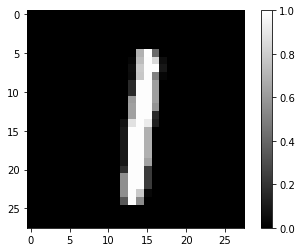

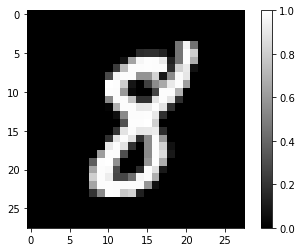

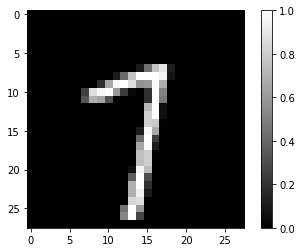

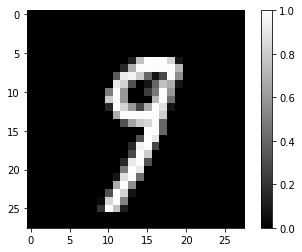

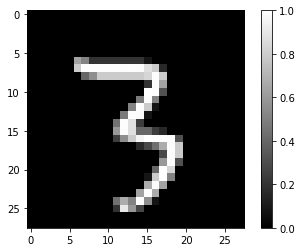

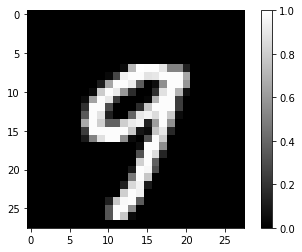

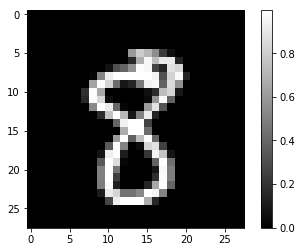

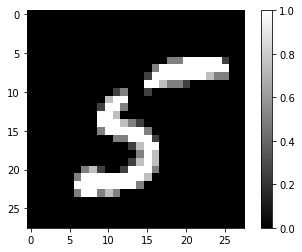

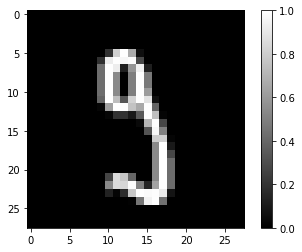

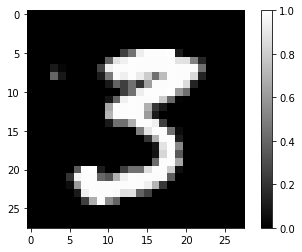

[1]


In [29]:
for xx in x_train[4]:
    xx = np.squeeze(xx)
    plt.imshow(xx, cmap='gray')
    plt.colorbar()
    plt.show()
print(y_train[4])